# ДЗ №7 по теме перестройки в геноме

В этом задании предстоит разобраться, на сколько хорошо и в каких пределах, жадный алгоритм подсчета перестановок будет возвращать похожее количество перестановок на то, что было в действительности.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(239)

### Симуляция (2 балла)
Будем работать в рамках Random Breakage Model - то есть считать, что разрывы могут происходить в любом месте последовательности. В примере будем пользоваться обозначением синтенных блоков числами, а их ориентацию будем обозначать знаком (+ или -).  
Симуляция заключается в следующем:  
Нужно взять последовательность чисел от 1 до 1000, после чего проделать в этой последовательности k разворотов (разворот, включает в себя смену знаков). Какие стоит выбирать k, станет понятно в последнем задании.

In [3]:
def make_rotations(k):
    seq = np.arange(1, 1001)
    for _ in range(k):
        left, right = np.random.randint(0, 1000, size=2)
        
        if left > right:
            left, right = right, left
        
        seq[left: right + 1] = -seq[left: right + 1][::-1]
    return seq

### Жадный алгоритм сортировки поворотами (2 балла)
Напишите жадный алгоритм сортировки разворотами (см. лекцию), который в качестве ответа возвращает количество операций разворота, которые понадобилось сделать.

In [4]:
def greedy_sort(seq):
    rotation_counter = 0
    for i in range(1, 1001):
        if abs(seq[i - 1]) != i:
            index = np.where(seq == i)
            
            if index[0].size == 0:
                index = np.where(seq == -i)
            
            index = index[0][0]
            seq[i - 1: index + 1] = -seq[i - 1: index + 1][::-1]
            rotation_counter += 1
        
        if seq[i - 1] == -i:
            seq[i - 1] = i
            rotation_counter += 1
    
    return rotation_counter

### Анализ расстояния (4 балла)
Постройте график зависимости расстояния которое возвращает жадный алгоритм от реального расстояния.  Проанализируйте, что происходит при небольшом количестве поворотов и когда поворотов сделано очень много.  
Определите, при каком количестве поворотов все ломается, например, ответ отличается > чем на 25, причем жадный алгоритм возвращает меньше операций, чем происходит в симмуляции. Чтобы точнее найти количество разворотов, при котором это происходит, повторите симуляцию много раз и постройте распределение этой величины деленной на длину изначальной последовательности (1000).  
Постарайтесь объяснить, что происходит.

In [5]:
%%time
true_rot_numbers = []
greedy_rot_numbers = []

for k in range(1, 3000):
    seq = make_rotations(k)
    greedy_rot_number = greedy_sort(seq)
    true_rot_numbers.append(k)
    greedy_rot_numbers.append(greedy_rot_number)

Wall time: 1min 36s


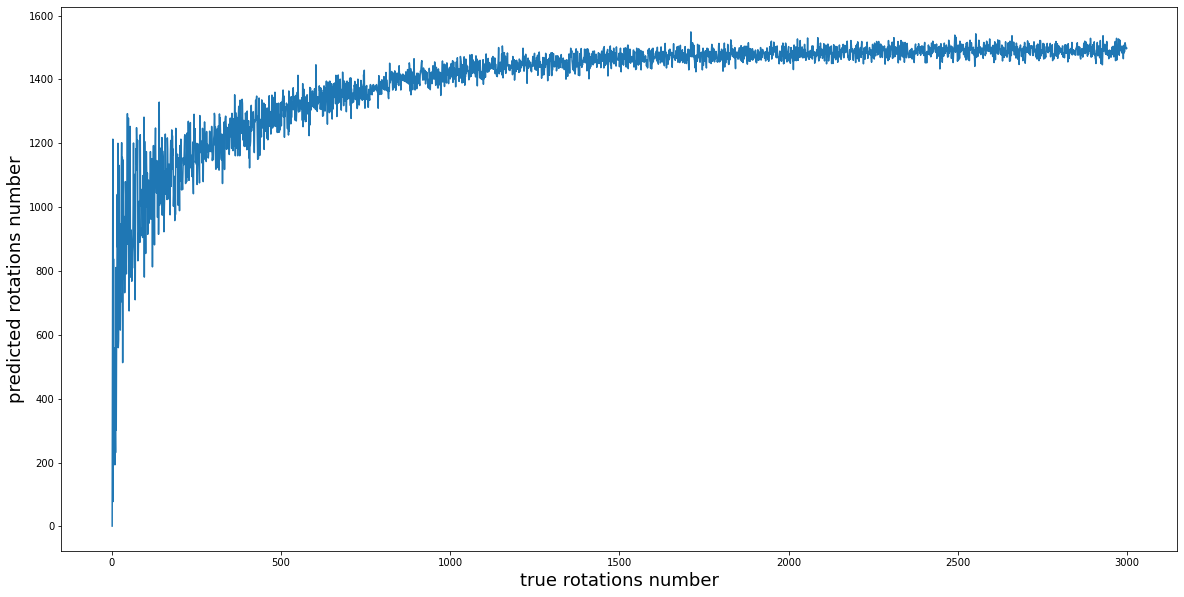

In [6]:
plt.figure(figsize=(20,10))
plt.plot(true_rot_numbers, greedy_rot_numbers)
plt.xlabel('true rotations number', fontsize=18)
plt.ylabel('predicted rotations number', fontsize=18)
plt.show()

#### Видим некоторое "насыщение" отношения $\frac{predicted\_rotations\_number}{true\_rotations\_number}$ - это обусловленно тем, что наш жадный алгоритм, начиная с какого-то $k$ приводит последовательность в упорядоченный вид за меньшее количество разворотов (относительно количества разворотов, которое мы использовали при генерации неупорядоченной последовательности). Это вполне логичное поведение из-за ограниченности длины нашей последовательности. 
#### При небольшом же количестве исходных поворотов, наоборот, жадный алгоритм не всегда находит оптимальную последовательность разворотов.

In [7]:
%%time
k = 1
mean_predicted_k = 1
while k - mean_predicted_k <= 25:
    sum_predicted_k = 0
    for _ in range(10):
        seq = make_rotations(k)
        predicted_k = greedy_sort(seq)
        sum_predicted_k += predicted_k
    mean_predicted_k = sum_predicted_k / 10
    k += 1
print(k)

1490
Wall time: 4min 50s


#### Получили конкретное $k$ - число разворотов, начиная с которого наш жадный алгоритм находит более оптимальную последовательность разворотов для упорядочивания последовательности.

In [10]:
%%time
probability = []
simulations_number = 100
for k in range(1400, 1600):
    broken_counter = 0
    for _ in range(simulations_number):
        seq = make_rotations(k)
        predicted_k = greedy_sort(seq)
        if k - predicted_k > 25:
            broken_counter += 1
    probability.append(broken_counter / simulations_number)

Wall time: 10min 56s


#### Нашли распределение вероятности "поломки" для каждого $k$ из заданного диапазона (при этом для гладкости графика выбрал число симуляций равное 100)

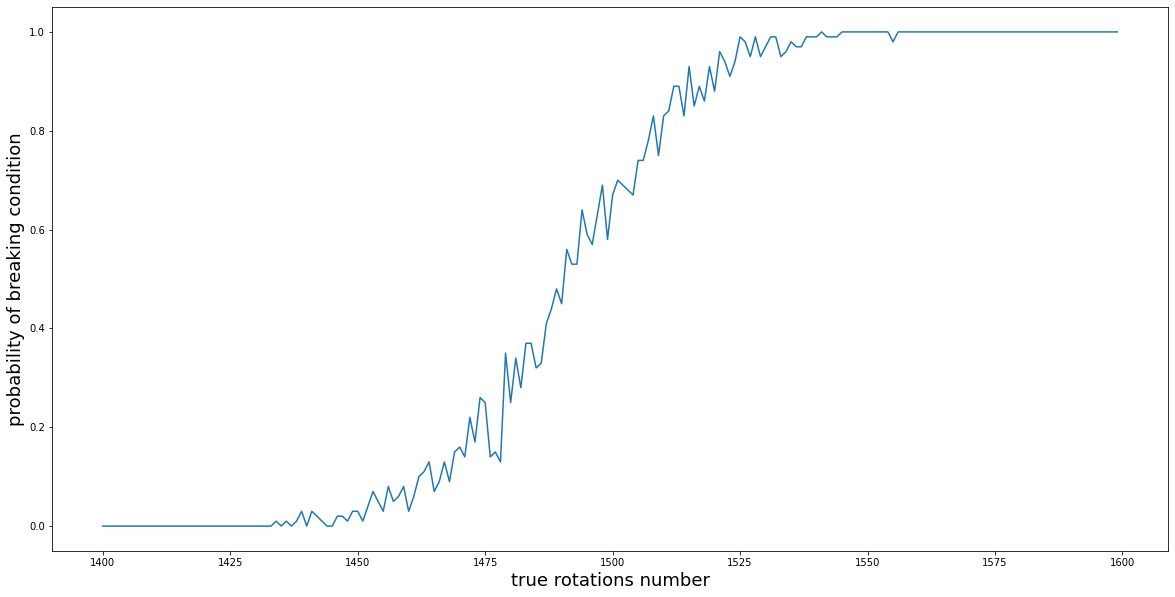

In [11]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1400, 1600)], probability)
plt.xlabel('true rotations number', fontsize=18)
plt.ylabel('probability of breaking condition', fontsize=18)
plt.show()

#### Исходя из анализа графиков можно сделать предположение, что начиная с $k \approx 1.5 \cdot sequence\_length$ количество разворотов, которое использует жадный алгоритм меньше, чем изначальное количество разворотов, используемое при генерации последовательности. Наличие такого $k$ можно обосновать тем, что при совпадении отрезков двух разворотов (т.е. при общем диапазоне) они являются тождественным преобразованием последовательности, а некоторое множество разворотов в пределе обязательно будет иметь общий диапазон, следовательно и общее число разворотов изменяющих вид последовательности будет меньше исходного $k$.